# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 pixel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [4]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [6]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

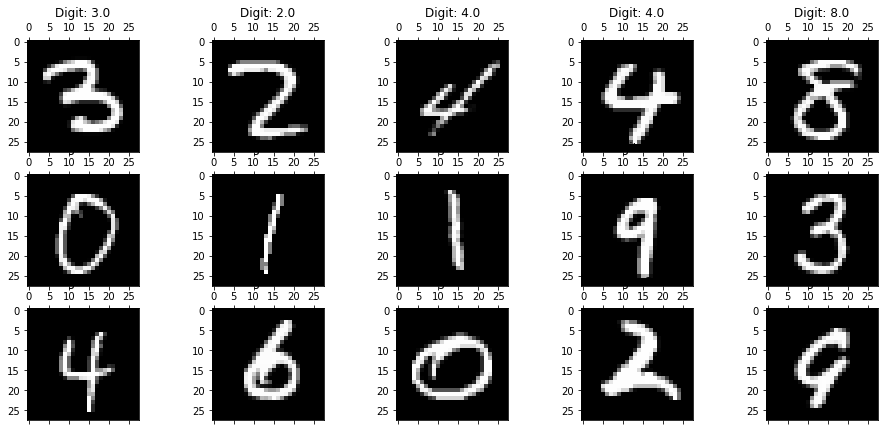

In [7]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

# 데이터 축소

## 데이터 스케일링

In [8]:
df.describe()     # df의 요약통계량 확인

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0,4.452429
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0,2.890195
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0,9.000000


* Column별로 분산과 최댓값 차이가 크기 때문에, 왜곡을 방지하기 위해서 스케일링이 필요해보인다.
* 이때, `StandardScaler`의 경우 결과에 음수값을 포함하기 때문에 적절하지 않고, `MinMaxScaler`는 각 Column의 최댓값을 1로 변환하기 때문에 왜곡이 생길 우려가 있다. 따라서, 각 pixel이 0에서 255 사이의 값을 갖는다는 점을 고려하여 전체 데이터를 255로 나누는 방법으로 스케일링을 진행하겠다.

In [9]:
X_scaled = X / 255     # 데이터 스케일링

In [10]:
pd.DataFrame(X_scaled).describe()     # 스케일링 결과 확인

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000774,0.000390,0.000183,0.000065,0.000051,0.000007,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023495,0.016691,0.010917,0.006125,0.006093,0.001258,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


스케일링이 적절하게 수행된 것으로 보인다.

## Train Data / Test Data 분리 (train_size = 0.8, test_size = 0.2)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size = 0.2,     # train_size 0.8, test_size 0.2
                                                    random_state = 22)     # 재현성을 위해 시드값 고정

In [12]:
print(X_train.shape)     # train data는 전체 70000개의 데이터 중 80% (70000*0.8 = 56000)
print(X_test.shape)     # test data는 전체 70000개의 데이터 중 20% (70000*0.2 = 14000)

(56000, 784)
(14000, 784)


## 원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교

### 주성분 개수 결정 1. PCA - Scree Plot 활용
* Scree Plot : a line plot of the eigenvalues of factors or principal components in an analysis
    * **used to determine the number of** factors to retain in an exploratory factor analysis (FA) or **principal components to keep in a principal component analysis (PCA)**
    * 참고 : https://en.wikipedia.org/wiki/Scree_plot

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA()     # n_components 설정 안 한 경우 - 모든 components 사용!
X_pca = pca.fit_transform(X_train)

In [15]:
# explained_variance_ratio_ : Percentage of variance explained by each of the selected components.
# 각 성분이 총 분산의 몇 퍼센트를 설명하는가?
# 공식 문서 : If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.

exp_var_ratio = pca.explained_variance_ratio_
print(exp_var_ratio)     # 각 성분별 설명 비중 확인
print()
print(len(exp_var_ratio))

[9.72613657e-02 7.15435955e-02 6.15383598e-02 5.42543488e-02
 4.87802769e-02 4.29483082e-02 3.26930196e-02 2.89292917e-02
 2.75510269e-02 2.33702649e-02 2.10829743e-02 2.04229983e-02
 1.71474168e-02 1.68961454e-02 1.58307922e-02 1.48158717e-02
 1.31761295e-02 1.28691547e-02 1.18637264e-02 1.15334095e-02
 1.06196326e-02 1.01057062e-02 9.61408276e-03 9.13797135e-03
 8.83835626e-03 8.38028333e-03 8.13774840e-03 7.86936516e-03
 7.44809689e-03 6.88064220e-03 6.57216443e-03 6.47790849e-03
 6.00745814e-03 5.86026975e-03 5.67338018e-03 5.43108154e-03
 5.05844128e-03 4.89156451e-03 4.78492544e-03 4.66592361e-03
 4.54738302e-03 4.46010889e-03 4.19192156e-03 3.96825408e-03
 3.84658547e-03 3.76011002e-03 3.61377371e-03 3.50763890e-03
 3.38780886e-03 3.19578051e-03 3.16522488e-03 3.12035312e-03
 2.96456596e-03 2.87206038e-03 2.81792455e-03 2.70151046e-03
 2.67417129e-03 2.56229465e-03 2.53158229e-03 2.44943499e-03
 2.39582152e-03 2.38949199e-03 2.29276416e-03 2.21436058e-03
 2.13043116e-03 2.064051

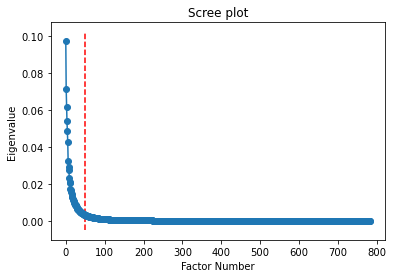

In [16]:
# Scree plot 그려보기

plt.plot(range(len(exp_var_ratio)), exp_var_ratio, marker = 'o')
plt.title("Scree plot")
plt.xlabel("Factor Number")
plt.ylabel("Eigenvalue")

from kneed import KneeLocator
kn = KneeLocator(range(len(exp_var_ratio)), exp_var_ratio, curve = 'convex', direction = 'decreasing')     # Elbow Point 찾기
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles = 'dashed', colors = 'r')     # Elbow Point를 수직선으로 표시

plt.show()

In [17]:
print("Elbow Point :", kn.knee)     # Elbow Point 확인

Elbow Point : 49


* Scree plot을 그려보니, Elbow Point는 Factor Number가 49일 때로 나타났다.

### 주성분 개수 결정 2. PCA - Rule of Thumb
* Rule of Thumb : 경험 법칙. 이 경우, 총 분산을 설명하는 비중이 70% ~ 90% 사이가 되는 주성분 개수를 선택한다.

In [18]:
# 총 분산을 설명하는 비중이 각각 70%, 80%, 90% 이기 위한 주성분 개수를 확인해보자.
# 공식 문서에 따르면, 0 < n_components < 1 이면서 svd_solver = 'full' 인 경우 누적 설명 비중을 구할 수 있다.
# 공식 문서 표현 : the number of components such that the amount of variance that needs to be explained
#                  is greater than the percentage specified by n_components

for value in [0.7, 0.8, 0.9]:
    pca = PCA(n_components = value, svd_solver = 'full')
    X_pca = pca.fit_transform(X_train)
    exp_var_ratio = pca.explained_variance_
    print(len(exp_var_ratio))   # len(exp_var_ratio) : pca.explained_variance_의 길이, 즉 변화하는 n_components에 대응하는 주성분 개수

26
43
87


출력 결과를 보면 주성분의 개수가 26개일 때 총 분산의 70%를, 43개일 때 총 분산의 80%를, 그리고 87개일 때 총 분산의 90%를 설명할 수 있다.

### 주성분 개수 결정 3. LDA

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [20]:
# LDA는 지도 학습 Classification이므로 fit할 때 target(y_train)을 함께 학습시켜야 한다.
# 학습 시 y_train은 1D array 형태로 입력! - numpy의 ravel 메서드 활용

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train, np.ravel(y_train))

In [21]:
exp_var_ratio = lda.explained_variance_ratio_     # 각 성분별 설명 비중 확인하기
exp_var_ratio

array([0.2363677 , 0.20366822, 0.1777849 , 0.10633735, 0.09493955,
       0.06921094, 0.05012553, 0.03445123, 0.02711456])

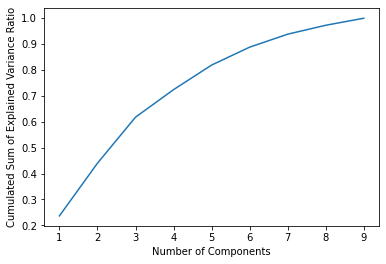

[0.2363677  0.44003592 0.61782083 0.72415818 0.81909774 0.88830868
 0.93843421 0.97288544 1.        ]


In [22]:
# 누적 설명 비중(Cumulated Sum of Explained Variance Ratio) 그래프 그려보기

exp_var_ratio_cumsum = np.cumsum(exp_var_ratio)     # 누적 설명 비중

# 주성분 개수에 대응하는 누적 설명 비중을 확인하는 것이 목적이므로, X축에는 index에 1을 더한 값을 배치('개수'를 뜻함)
plt.plot(list(range(1, 1+len(exp_var_ratio_cumsum))), exp_var_ratio_cumsum)
plt.xlabel("Number of Components")
plt.ylabel("Cumulated Sum of Explained Variance Ratio")
plt.show()

print(exp_var_ratio_cumsum)

주성분 개수가 4개일 때 총 분산의 70% 이상을, 5개 이상부터는 총 분산의 80% 이상을 설명함을 알 수 있다.

### 주성분 개수 최종 결정

* **PCA : 50개**
    * 이유 : 1. Scree Plot에서 Elbow Point가 Factor Number가 49일 때임을 확인했고, 2. 총 분산 설명력이 큰 순서대로 주성분 개수를 43개 이상, 87개 이하로 설정할 때 총 분산의 80% 이상, 90% 이하를 설명할 수 있음을 확인했다. 따라서, Elbow Point에 대응하는 주성분 개수인 50개를 그대로 선택하면 적절하겠다고 판단하였다.
* **LDA : 5개**
    * 누적 설명 비중 그래프를 그려보았을 때, 총 분산 설명력이 큰 순서대로 주성분 개수를 5개 이상 선택하면 총 분산의 80% 이상을 설명할 수 있음을 확인하였다. 따라서, 설명 비중이 70%에서 80%로 넘어가는 순간인 5개로 주성분 개수를 결정하였다.

## Training
* Time Stamp 찍어서 Training 시간 비교하기 & Test Accuracy 비교하기

**RandomForestClassifier, LGBMClassifier, SVC** 알고리즘으로 학습을 진행한 후 결과를 비교해보고자 한다.

In [26]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

import time     # time() 메서드로 time stamp 찍기
from sklearn.metrics import accuracy_score     # Test Accuracy 확인

from tqdm import tqdm     # 진행 상황 확인 (원본 데이터, PCA 축소 데이터는 시간이 오래 걸릴 수 있으므로 tqdm을 활용하고자 함)

In [29]:
rf_clf = RandomForestClassifier(random_state = 22)     # RandomForestClassifier 객체 생성
lgbm_clf = LGBMClassifier(random_state = 22)     # LGBMClassifier 객체 생성
svc_clf = SVC(random_state = 22)     # SVC 객체 생성

clfs = [rf_clf, lgbm_clf, svc_clf]     # 각 객체를 리스트에 저장

### 원본 데이터

In [30]:
for clf in tqdm(clfs):
    start = time.time()     # 시작 시간
    clf.fit(X_train, np.ravel(y_train))     # 원본 데이터 Training
    end = time.time()     # 완료 시간
    elapse_time = end - start     # 경과 시간
    
    print("Classifier :", clf.__class__.__name__)
    print("Training 시간 :", elapse_time)
    print("Test Accuracy :", accuracy_score(y_test, clf.predict(X_test)))
    print()

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Classifier : RandomForestClassifier
Training 시간 : 116.10233426094055


 33%|███████████████████████████▋                                                       | 1/3 [01:57<03:55, 117.67s/it]

Test Accuracy : 0.9685714285714285

Classifier : LGBMClassifier
Training 시간 : 259.1202244758606


 67%|███████████████████████████████████████████████████████▎                           | 2/3 [06:18<02:40, 160.73s/it]

Test Accuracy : 0.9777142857142858

Classifier : SVC
Training 시간 : 924.2695066928864


100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [28:55<00:00, 578.41s/it]

Test Accuracy : 0.9796428571428571



**원본 데이터 Training 결과**
* Training 시간 (빠른 순서대로) : RandomForestClassifier - LGBMClassifier - SVC
* Test Accuracy (높은 순서대로) : SVC - LGBMClassifier - RandomForestClassifier

### PCA 축소 데이터 (주성분 개수 : 50개)

In [31]:
pca = PCA(n_components = 50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)     # Test Data는 transform만!

In [32]:
for clf in tqdm(clfs):
    start = time.time()     # 시작 시간
    clf.fit(X_train_pca, np.ravel(y_train))     # PCA 축소 데이터 Training
    end = time.time()     # 완료 시간
    elapse_time = end - start     # 경과 시간
    
    print("Classifier :", clf.__class__.__name__)
    print("Training 시간 :", elapse_time)
    print("Test Accuracy :", accuracy_score(y_test, clf.predict(X_test_pca)))
    print()

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Classifier : RandomForestClassifier
Training 시간 : 171.53003692626953


 33%|███████████████████████████▋                                                       | 1/3 [02:52<05:45, 172.70s/it]

Test Accuracy : 0.9561428571428572

Classifier : LGBMClassifier
Training 시간 : 51.10163688659668


 67%|███████████████████████████████████████████████████████▎                           | 2/3 [03:46<02:16, 136.92s/it]

Test Accuracy : 0.9657857142857142

Classifier : SVC
Training 시간 : 107.32633829116821


100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [06:04<00:00, 121.40s/it]

Test Accuracy : 0.9835714285714285



**PCA 축소 데이터 Training 결과**
* Training 시간 (빠른 순서대로) : LGBMClassifier - RandomForestClassifier - SVC
* Test Accuracy (높은 순서대로) : SVC - LGBMClassifier - RandomForestClassifier

### LDA 축소 데이터 (주성분 개수 : 5개)

In [34]:
lda = LinearDiscriminantAnalysis(n_components = 5)
X_train_lda = lda.fit_transform(X_train, np.ravel(y_train))
X_test_lda = lda.transform(X_test)     # Test Data는 transform만!

In [37]:
for clf in clfs:
    start = time.time()     # 시작 시간
    clf.fit(X_train_lda, np.ravel(y_train))     # LDA 축소 데이터 Training
    end = time.time()     # 완료 시간
    elapse_time = end - start     # 경과 시간

    print("Classifier :", clf.__class__.__name__)
    print("Training 시간 :", elapse_time)
    print("Test Accuracy :", accuracy_score(y_test, clf.predict(X_test_lda)))
    print()

Classifier : RandomForestClassifier
Training 시간 : 49.58066701889038
Test Accuracy : 0.8455

Classifier : LGBMClassifier
Training 시간 : 9.044942617416382
Test Accuracy : 0.8444285714285714

Classifier : SVC
Training 시간 : 58.10084247589111
Test Accuracy : 0.8485714285714285



**LDA 축소 데이터 Training 결과**
* Training 시간 (빠른 순서대로) : LGBMClassifier - RandomForestClassifier - SVC
* Test Accuracy (높은 순서대로) : SVC - RandomForestClassifier - LGBMClassifier

### Training 결과 비교

* **Training 시간** : Training 시간은 차원이 줄어들수록(원본 데이터 784, PCA 50, LDA 5) 함께 줄어드는 것을 확인할 수 있다. 세 종류의 Training에서 가장 빠르게 Training이 진행된 LGBMClassifier의 경우를 보면, 원본 데이터에서 약 260초(4분 20초), PCA 축소 데이터에서 약 51초, LDA 축소 데이터에서 약 9초로 극적인 속도 향상을 확인할 수 있다.
* **Test Accuracy** : Test Accuracy는 차원이 줄어들수록 함께 낮아지지만, 원본 데이터와 PDA 축소 데이터의 경우 유의미하게 차이가 나지는 않는다. PCA에서 선택된 50개의 주성분이 총 분산의 80% 이상을 설명하기 때문에, 정확도가 거의 유사하게 나온 것이다.
* 최종 모델은 Training 시간이 적게 들면서도, 비교적 높은 Test Accuracy를 도출한 LGBMClassifier가, 차원 축소 기법으로는 PCA가 가장 효율적일 것으로 생각된다.

### 최종 모델

In [44]:
# LGBMClassifier 하이퍼파라미터 튜닝
# max_depth와 num_leaves를 조정하면서 정확도가 어떻게 달라지는지 확인하자!

# max_depth는 2부터 9까지 차례대로 바꿔보기 (default : -1)
max_depth = [*range(2, 10)]     
# num_leaves는 2^(max_depth)보다는 작으면서 적절히 크도록(해당 값의 2/3) 설정 - Overfitting 방지 (공식문서 참고)
num_leaves = list(map(lambda x : int((2**x)*(2/3)), max_depth))

for max_depth, num_leaves in zip(max_depth, num_leaves):
    lgbm_clf_temp = LGBMClassifier(random_state = 22,
                                   max_depth = max_depth, num_leaves = num_leaves)   # max_depth, num_leaves 변화에 따른 성능 변화 체크
    lgbm_clf_temp.fit(X_train_pca, np.ravel(y_train))
    y_pred = lgbm_clf_temp.predict(X_test_pca)
    print("Max Depth :", max_depth)
    print("Number of Leaves :", num_leaves)
    print("Test Accuracy :", accuracy_score(y_test, y_pred))
    print()

Max Depth : 2
Number of Leaves : 2
Test Accuracy : 0.8359285714285715

Max Depth : 3
Number of Leaves : 5
Test Accuracy : 0.9196428571428571

Max Depth : 4
Number of Leaves : 10
Test Accuracy : 0.943

Max Depth : 5
Number of Leaves : 21
Test Accuracy : 0.954

Max Depth : 6
Number of Leaves : 42
Test Accuracy : 0.9616428571428571

Max Depth : 7
Number of Leaves : 85
Test Accuracy : 0.9647142857142857

Max Depth : 8
Number of Leaves : 170
Test Accuracy : 0.9656428571428571

Max Depth : 9
Number of Leaves : 341
Test Accuracy : 0.9671428571428572



* 하이퍼파라미터 튜닝 결과, max_depth = 9, num_leaves = 341일 때 Test Accuracy가 가장 높은 것으로 확인되었다.
* 튜닝 결과대로 하이퍼파라미터를 설정한 후, 다시 한번 3.4.2에서와 마찬가지로 학습을 진행해보았다.

In [46]:
lgbm_clf_final = LGBMClassifier(random_state = 22, max_depth = 9, num_leaves = 341)     # LGBMClassifier 객체 생성

start = time.time()     # 시작 시간
lgbm_clf_final.fit(X_train_pca, np.ravel(y_train))     # PCA 축소 데이터 Training
end = time.time()     # 완료 시간
elapse_time = end - start     # 경과 시간
    
print("Classifier :", lgbm_clf_final.__class__.__name__)
print("Training 시간 :", elapse_time)
print("Test Accuracy :", accuracy_score(y_test, lgbm_clf_final.predict(X_test_pca)))

Classifier : LGBMClassifier
Training 시간 : 80.46940016746521
Test Accuracy : 0.9671428571428572


하이퍼파라미터 튜닝 후 Test Accuracy는 살짝 높아졌지만(튜닝 전 : 0.9657857142857142 VS 튜닝 후 : 0.9671428571428572), Training 시간이 늘어난 것에 비해 유의미한 변화라고 생각되지는 않는다. 따라서, 전반적인 성능을 고려하면 기본 세팅으로 차원 축소를 진행하는 것이 더 효율적이라고 생각된다.